<a href="https://colab.research.google.com/github/azizeko29/new_deteksi_fraud/blob/master/%5Bnew_RUS%2BROS_v2%5D_UCSD_pemodelan_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [0]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [0]:
# confussion_matrik(y,pred)

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [0]:
def testing(model,X_test,y_test):
    result_ = []

#       t0 = time.time()
#       model.fit(X_train, y_train)
#       t1 = time.time()
#       waktu = t1 - t0
    predict = model.predict(X_test)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

    result = [accuracy,sensitivity,specifity,precision,recall,f1_score]
        
    result_.append(result)
        
    return result_

In [0]:
# from sklearn.decomposition import PCA
# import pylab as pl
# def plot_this(X_rs,y_rs,method):
#   # Use principal component to condense the 10 features to 2 features
#   pca = PCA(n_components=2).fit(X_rs)
#   pca_2d = pca.transform(X_rs)
#   # Assign colors
#   for i in range(0, pca_2d.shape[0]):
#     if y_rs[i] == 0:
#       c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
#     elif y_rs[i] == 1:
#       c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
#   pl.legend([c1, c2], ['Class 1', 'Class 2'])
#   pl.title(method)
#   pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
#   pl.show()
    


## ---------

In [0]:
# ##read data

# train = pd.read_csv('data/ucsd_fico_train.csv',sep=",")

# test = pd.DataFrame({'0': [0]})
# test_ = pd.read_csv('data/ucsd_fico_test.csv',sep=",")
# test = test.append(test_)
# test = test.reset_index(drop=True)

# df = train.copy()
# df['Class'] = test
# # df = pd.read_csv('data/sample_data.csv',sep=",")

# # df0 = df.copy()
# # df.info()

In [0]:
# # Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# link = 'https://drive.google.com/open?id=1FrxKcydTkUSbrgTSnnocnGQBtgZj3LKt' # The shareable link

# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('ucsd_fico_train.csv')  
# read_df = pd.read_csv('ucsd_fico_train.csv')


In [0]:

# link = 'https://drive.google.com/open?id=1D4CeWw7WRuTUQB7Zq4E2_-Wgin0y7luT' # The shareable link

# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('ucsd_fico_test.csv')  
# test_ = pd.read_csv('ucsd_fico_test.csv')
# # Dataset is now stored in a Pandas Dataframe
# # df.info()

In [0]:
# test = pd.DataFrame({'0': [0]})
# test = test.append(test_)
# test = test.reset_index(drop=True)

# # df = read_df.copy()
# read_df['Class'] = test

In [0]:
# df = read_df.copy()

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# ##read data

df_train = pd.read_csv('drive/My Drive/Deteksi fraud/data/UCSD_preprocessing_train.csv',sep=";")

# read_df.head()

In [0]:
# ##read data

df_test = pd.read_csv('drive/My Drive/Deteksi fraud/data/UCSD_preprocessing_test.csv',sep=";")

# read_df.head()# df.head()

## --

In [120]:
df_train['Class'].value_counts()

0    27805
1      837
Name: Class, dtype: int64

In [121]:
limapuluh_persen = int(df_train['Class'].value_counts()[0] * (50/100))
limapuluh_persen

13902

In [122]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df_train.copy()
# df_copy = df_copy.sample(frac=1)

fraud_df = df_copy.loc[df_copy['Class'] == 1].sample(n=limapuluh_persen,random_state=1,replace=True)
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=limapuluh_persen,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.shape

(27804, 15)

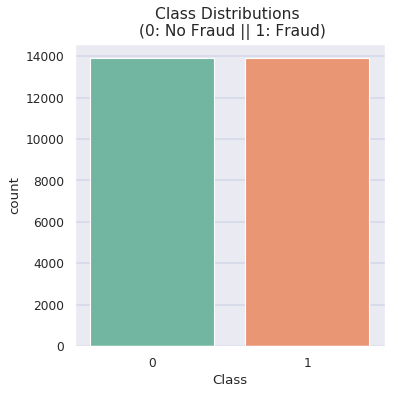

In [123]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

In [0]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [125]:
y_new.value_counts()

1    13902
0    13902
Name: Class, dtype: int64

In [126]:
X_new.columns

Index(['amount', 'hour1', 'zip1', 'field1', 'field2', 'flag1', 'field3',
       'field4', 'indicator1', 'indicator2', 'flag2', 'flag3', 'flag4',
       'flag5'],
      dtype='object')

In [0]:
X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class'].copy()

In [128]:
y_test.value_counts()

0    11917
1      359
Name: Class, dtype: int64

# # k-folds


In [0]:
def validasi_model (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [0]:
# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

    
clf_RF = RandomForestClassifier(random_state=1,n_estimators=75)
clf_AB = AdaBoostClassifier(random_state=1,n_estimators=100)
clf_B = BaggingClassifier(random_state=1,n_estimators=100)
clf_ET = ExtraTreesClassifier(random_state=1,n_estimators=100)
clf_GB = GradientBoostingClassifier(random_state=1,n_estimators=100, max_depth= 9)

##skenario 
skenario_1 = {}
skenario_1['1'] = clf_RF
# skenario_1['2'] = clf_AB
# skenario_1['3'] = clf_B
# skenario_1['4'] = clf_ET
skenario_1['5'] = clf_GB


In [131]:
result = {}
for i in skenario_1:
  
    clf_skenario = skenario_1[i]
    result[i] = validasi_model(clf_skenario,X_new,y_new,5)
                

df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i].iloc[5:,:])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
0,0.995935,1.000000,0.991870,0.991937,1.000000,0.995952,1.404175
1,0.987482,0.999787,0.975184,0.975784,0.999787,0.987635,8.831004


In [0]:
# importances = clf.feature_importances_
# indices = np.argsort(importances)[::-1]
# fitur_importance =[]
# for f in range(X_new.shape[1]):
#     if  importances[indices[f]] > 0 :
#         fitur_importance.append([X_new.columns[indices[f]],importances[indices[f]]])
#         print("%2d) %-*s %f" % (f + 1, 30,
#         X_new.columns[indices[f]],
#         importances[indices[f]]))

In [0]:
# df_FI = pd.DataFrame(data=fitur_importance,columns=['fitur','value'])
# # np.array(df_FI['fitur'])
# df_FI

----

## Testing

In [0]:
def validasi_testing (clf,X,y):
    testing_result = testing(clf,X,y)
    df_result = pd.DataFrame(data= testing_result, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

#     df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [135]:
from sklearn.ensemble import RandomForestClassifier
n_tree = 100
# clf_RF_ = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
clf_RF.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
n_tree = 100
# clf = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
# clf_GB = GradientBoostingClassifier(random_state=1,n_estimators=50)

clf_GB.fit(X_new,y_new)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [137]:
result = {}
for i in skenario_1:
  
    clf_skenario = skenario_1[i]
    result[i] = validasi_testing(clf_skenario,X_test,y_test)
    
                
df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score
0,0.977924,0.451253,0.993790,0.686441,0.451253,0.544538
1,0.968231,0.579387,0.979945,0.465324,0.579387,0.516129


----

testing balance data

In [138]:
y_test.value_counts()

0    11917
1      359
Name: Class, dtype: int64

In [0]:
df_test = X_test.copy()
df_test['Class'] = y_test.copy()

In [140]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df_test.copy()
# df_copy = df_copy.sample(frac=1)

fraud_df = df_copy.loc[df_copy['Class'] == 1]
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=359,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,amount,hour1,zip1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,Class
0,38.85,22,891,2,0,0,-3204,23,0,0,0,1,0,1,1
1,25.90,0,920,3,0,1,-5426,7,0,0,0,1,0,2,1
2,10.36,3,417,3,1,1,1737,7,0,0,1,1,0,2,1
3,12.95,15,908,3,0,1,982,20,1,0,0,0,0,1,0
4,10.36,13,906,3,0,0,-16245,24,0,0,0,0,0,1,1


In [0]:
X_test_ = df_new.drop('Class', axis=1)
y_test_ = df_new['Class'].copy()

In [142]:
y_test_.value_counts()

1    359
0    359
Name: Class, dtype: int64

In [143]:
result = {}
for i in skenario_1:
  
    clf_skenario = skenario_1[i]
    result[i] = validasi_testing(clf_skenario,X_test_,y_test_)
    
                
df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score
0,0.722841,0.451253,0.994429,0.987805,0.451253,0.619503
1,0.781337,0.579387,0.983287,0.971963,0.579387,0.726003


In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf.estimators_[8], out_file=dot_data,  
#                          feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf_DT,out_file=dot_data,feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

-------

## Tuning

In [87]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(random_state=1)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {
#                 "max_depth": [5,9,11,15 ],
              'n_estimators' : [10,25,50,75,100],
               "max_features": ['sqrt','log2',None],
#               "min_samples_split": sp_randint(2, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False,random_state=1)

start = time()
random_search.fit(X_new, y_new)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {
#                 "max_depth": [5,9,11,15 ],
              'n_estimators' : [10,25,50,75,100],
               "max_features": ['sqrt','log2',None],
#               "min_samples_split": [2, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X_new, y_new)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV took 127.27 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.996 (std: 0.001)
Parameters: {'n_estimators': 75, 'max_features': 'sqrt'}

Model with rank: 1
Mean validation score: 0.996 (std: 0.001)
Parameters: {'n_estimators': 100, 'max_features': 'sqrt'}

Model with rank: 1
Mean validation score: 0.996 (std: 0.001)
Parameters: {'n_estimators': 75, 'max_features': 'log2'}

Model with rank: 1
Mean validation score: 0.996 (std: 0.001)
Parameters: {'n_estimators': 100, 'max_features': 'log2'}

GridSearchCV took 127.09 seconds for 15 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.996 (std: 0.001)
Parameters: {'max_features': 'sqrt', 'n_estimators': 75}

Model with rank: 1
Mean validation score: 0.996 (std: 0.001)
Parameters: {'max_features': 'sqrt', 'n_estimators': 100}

Model with rank: 1
Mean validation score: 0.996 (std: 0.001)
Parameters: {'max_features': 'log2', 'n_estimators': 75}

Model with rank: 

In [88]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = GradientBoostingClassifier(random_state=1)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3,5,9],
              'n_estimators' : [10,25,50,75,100],
#               "max_features": sp_randint(1, 11),
#               "min_samples_split": sp_randint(2, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False,random_state=1)

start = time()
random_search.fit(X_new, y_new)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3,5,9],
              'n_estimators' : [10,25,50,75,100],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X_new, y_new)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV took 183.39 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.987 (std: 0.002)
Parameters: {'n_estimators': 100, 'max_depth': 9}

Model with rank: 2
Mean validation score: 0.981 (std: 0.001)
Parameters: {'n_estimators': 75, 'max_depth': 9}

Model with rank: 3
Mean validation score: 0.971 (std: 0.001)
Parameters: {'n_estimators': 50, 'max_depth': 9}

GridSearchCV took 182.93 seconds for 15 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.987 (std: 0.002)
Parameters: {'max_depth': 9, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.981 (std: 0.001)
Parameters: {'max_depth': 9, 'n_estimators': 75}

Model with rank: 3
Mean validation score: 0.971 (std: 0.001)
Parameters: {'max_depth': 9, 'n_estimators': 50}

